In [1]:
import matplotlib
matplotlib.use('Agg')

import sys
import matplotlib.animation
print matplotlib.animation.writers.list()
print sys.path
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *

from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

import sys
sys.path.append('/home/antolikjan/remote/IOV/projects/mozaik/contrib/')
import Kremkow_plots
%matplotlib inline

setup_logging()

data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/IOV/projects/mozaik/contrib/MorganTaylorModel/20171013-165249[param_new.defaults]CombinationParamSearch{12}/MorganTaylorModel_ParameterSearch_____tau_rec:100_sigma:1.0_base_weight:0.0024_tau_syn_I:1.9_v_thresh:-56_sigma:2.0_gain:60_contrast_scaler:1500000_luminance_gain:0.0_stdev:2.4_sigma_c:0.2_sigma_s:0.5','store_stimuli': False}),replace=True)
                  
NeuronAnnotationsToPerNeuronValues(data_store,ParameterSet({})).analyse()
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()

lgn_on_ids = param_filter_query(data_store,sheet_name="X_ON").get_segments()[0].get_stored_spike_train_ids()
lgn_off_ids = param_filter_query(data_store,sheet_name="X_OFF").get_segments()[0].get_stored_spike_train_ids()



[u'imagemagick_file', u'imagemagick', u'ffmpeg', u'ffmpeg_file', u'html', u'pillow']
['', '/home/antolikjan/virt_env/mozaik/lib/python2.7', '/home/antolikjan/virt_env/mozaik/lib/python2.7/plat-x86_64-linux-gnu', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-old', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-dynload', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/IPython/extensions', '/home/antolikjan/.ipython']


  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
NeuronAnnotationsToPerNeuronValues analysis took: 6.51626491547seconds


In [2]:
#find neuron with preference closet to 0  
l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l4_exc_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')[0]
l4_exc = analog_ids[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.get_value_by_id(analog_ids),l4_exc_phase.get_value_by_id(analog_ids))])]
l4_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L4')[0]
l4_inh_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Inh_L4')[0]
l4_inh = analog_ids_inh[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_inh_or.get_value_by_id(analog_ids_inh),l4_inh_phase.get_value_by_id(analog_ids_inh))])]
l4_exc_or_many = numpy.array(l4_exc_or.ids)[numpy.nonzero(numpy.array([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.values,l4_exc_phase.values)]) < 0.1)[0]]#find neuron with preference closet to 0  

spike_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_spike_train_ids()


In [4]:
dsv = queries.param_filter_query(data_store,st_name='FlashedBar')
for ads in dsv.get_analysis_result():
    sid = MozaikParametrized.idd(ads.stimulus_id)
    sid.x=0
    ads.stimulus_id = str(sid)
for seg in dsv.get_segments():    
    sid = MozaikParametrized.idd(seg.annotations['stimulus'])
    sid.x=0
    seg.annotations['stimulus'] = str(sid)
for seg in dsv.get_segments(null=True):    
    sid = MozaikParametrized.idd(seg.annotations['stimulus'])
    sid.x=0
    seg.annotations['stimulus'] = str(sid)    

In [5]:
param_filter_query(data_store,sheet_name='V1_Exc_L4',st_direct_stimulation_name=None,st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=5,value_name=['orientation fitting error of Firing rate'],ads_unique=True)

In [6]:
TrialMean(queries.param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating'),ParameterSet({'cond_exc' : True,'cond_inh' : True, 'vm' : False })).analyse()
dsv = param_filter_query(data_store,analysis_algorithm='TrialMean',st_name='FullfieldDriftingSinusoidalGrating',sheet_name='V1_Exc_L4',y_axis_name=['inh. conductance trial-to-trial mean','exc. conductance trial-to-trial mean'],st_orientation=0,st_contrast=100)
dsv.print_content()


  Starting TrialMean analysis
TrialMean analysis took: 775.492623091seconds
  DSV info:
     Number of recordings: 0
     Number of ADS: 2
       AnalogSignalList : 2


  Starting AnalogSignal_PerNeuronBetweenSignalCorrelation analysis
  Starting AnalogSignal_PerNeuronBetweenSignalCorrelation analysis
  1
  1
  DSV info:
  DSV info:
     Number of recordings: 0
     Number of recordings: 0
     Number of ADS: 2
     Number of ADS: 2
       AnalogSignalList : 2
       AnalogSignalList : 2
  ANALYSIS RESULTS
  ANALYSIS RESULTS
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialMean', "identifier":'AnalogSignalList', "name":'AnalogSignalList', "neuron":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":0.0, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "x_axis_name

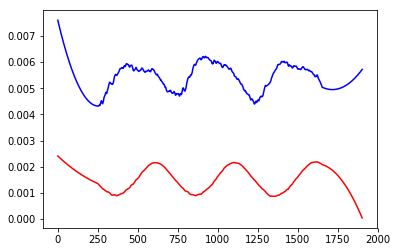

In [8]:
reload(mozaik.analysis.analysis)
mozaik.analysis.analysis.AnalogSignal_PerNeuronBetweenSignalCorrelation(dsv,ParameterSet({'value_name1':'inh. conductance trial-to-trial mean','value_name2' : 'exc. conductance trial-to-trial mean'})).analyse()


  Starting AnalogSignal_PerNeuronBetweenSignalCorrelation analysis
  1
  DSV info:
     Number of recordings: 0
     Number of ADS: 2
       AnalogSignalList : 2
  ANALYSIS RESULTS
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialMean', "identifier":'AnalogSignalList', "name":'AnalogSignalList', "neuron":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":0.0, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "x_axis_name":'time', "y_axis_name":'exc. conductance trial-to-trial mean'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialMean', "identifier":'AnalogSignalList'

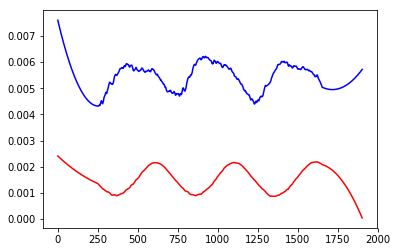

In [7]:
reload(mozaik.analysis.analysis)
mozaik.analysis.analysis.AnalogSignal_PerNeuronBetweenSignalCorrelation(dsv,ParameterSet({'value_name1':'inh. conductance trial-to-trial mean','value_name2' : 'exc. conductance trial-to-trial mean'})).analyse()


In [20]:
print l4_exc_or_many_analog

[2726 2904 2910 2954 2963 3085 3138 3269 3415 3436 3599 3602 3608 3674 3810
 4024 4206 4231 4243 4407 4481 4554 4710 4809 4901 4921 5003 5170 5247 5253]


In [18]:
param_filter_query(data_store,analysis_algorithm='AnalogSignal_PerNeuronBetweenSignalCorrelation',st_contrast=100).get_analysis_result()[0].get_value_by_id(l4_exc_or_many_analog)

[0.71349738611782187,
 -0.75070771154131022,
 -0.64285926062646181,
 0.86077543012317836,
 -0.89126028195703155,
 -0.75675334603271038,
 -0.81168286600529749,
 -0.86352832061235196,
 -0.97103401559560398,
 -0.66634041758446683,
 -0.84606181223643073,
 -0.2901508410477826,
 -0.73618363993447544,
 0.074148079557073643,
 -0.40814638827893746,
 0.25426599207635575,
 -0.54254760078335995,
 -0.58926394498754875,
 -0.17122225431327776,
 -0.83676176792317947,
 -0.39964449228114535,
 0.44326487680236515,
 -0.86527077624582627,
 -0.44866207716025208,
 -0.70744344334839759,
 -0.13157146283577606,
 -0.63309758759814694,
 0.22618864637051223,
 -0.54512054247016384,
 -0.68472899963867728]

1
1


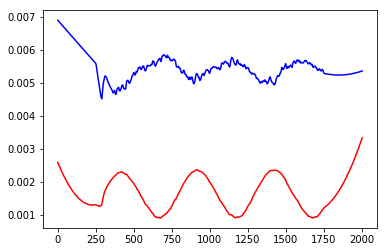

In [47]:
dsv = param_filter_query(data_store,analysis_algorithm='TrialMean',st_name='FullfieldDriftingSinusoidalGrating',sheet_name='V1_Exc_L4',y_axis_name=['inh. conductance trial-to-trial mean','exc. conductance trial-to-trial mean'],st_orientation=0,st_contrast=100)
asl_exc = queries.param_filter_query(dsv, sheet_name='V1_Exc_L4',name='AnalogSignalList',y_axis_name=['exc. conductance trial-to-trial mean']).get_analysis_result()
asl_inh = queries.param_filter_query(dsv, sheet_name='V1_Exc_L4',name='AnalogSignalList',y_axis_name=['inh. conductance trial-to-trial mean']).get_analysis_result()
print len(asl_exc)
print len(asl_inh)


idds = [#2904, 
        #2954, 
        #3138,
        #3269, 
        3608,
        #5170
       ] 

from scipy.signal import savgol_filter

for idd in idds:
    a1 = asl_exc[0].get_asl_by_id(idd)
    a2 = asl_inh[0].get_asl_by_id(idd)
    pylab.figure()
    #pylab.plot(a1.magnitude.flatten(),'#ffbbbb',a2.rescale(a1.units).magnitude.flatten(),'#bbbbff')
    pylab.plot(savgol_filter(a1.magnitude.flatten(),501,2),'r',savgol_filter(a2.rescale(a1.units).magnitude.flatten(),501,2),'b')
    pylab.savefig("smoothed_G_"+str(idd)+".eps")




In [55]:
lgn_on_ids = param_filter_query(data_store,sheet_name="X_ON").get_segments()[0].get_stored_esyn_ids()
lgn_off_ids = param_filter_query(data_store,sheet_name="X_OFF").get_segments()[0].get_stored_esyn_ids()
print lgn_on_ids
print lgn_off_ids

[ 49  78 119 188 239]
[536 596 668 670 782]


In [64]:
segs = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',sheet_name='X_OFF',st_orientation=0,st_contrast=5).get_segments()
res = {
    'spike_times' : [],
    'Vms' : [],
}

for s in segs:
    res['spike_times'].append(s.get_spiketrain(lgn_off_ids[0]))
    res['Vms'].append(s.get_vm(lgn_off_ids[0]).magnitude)
    
import scipy.io
scipy.io.savemat('spikes_and_vm_LGN_OFF_CELL_gratings_LC.mat',res)    

In [70]:
print numpy.mean([len(param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',sheet_name='X_OFF',st_orientation=0,st_contrast=5).get_segments()[i].get_spiketrain(lgn_off_ids[0])) for i in xrange(0,10)])
print numpy.mean([len(param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',sheet_name='X_OFF',st_orientation=0,st_contrast=100).get_segments()[i].get_spiketrain(lgn_off_ids[0])) for i in xrange(0,10)])
print numpy.mean([len(param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',sheet_name='X_ON',st_orientation=0,st_contrast=5).get_segments()[i].get_spiketrain(lgn_on_ids[0])) for i in xrange(0,10)])
print numpy.mean([len(param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',sheet_name='X_ON',st_orientation=0,st_contrast=100).get_segments()[i].get_spiketrain(lgn_on_ids[0])) for i in xrange(0,10)])

12.5
21.4
12.9
24.6


In [19]:
l4_exc_or_many_analog = numpy.array(analog_ids)[numpy.nonzero(numpy.array([circular_dist(l4_exc_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids]) < 0.1)[0]]

/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
RasterPlot plotting took: 17.9600801468seconds


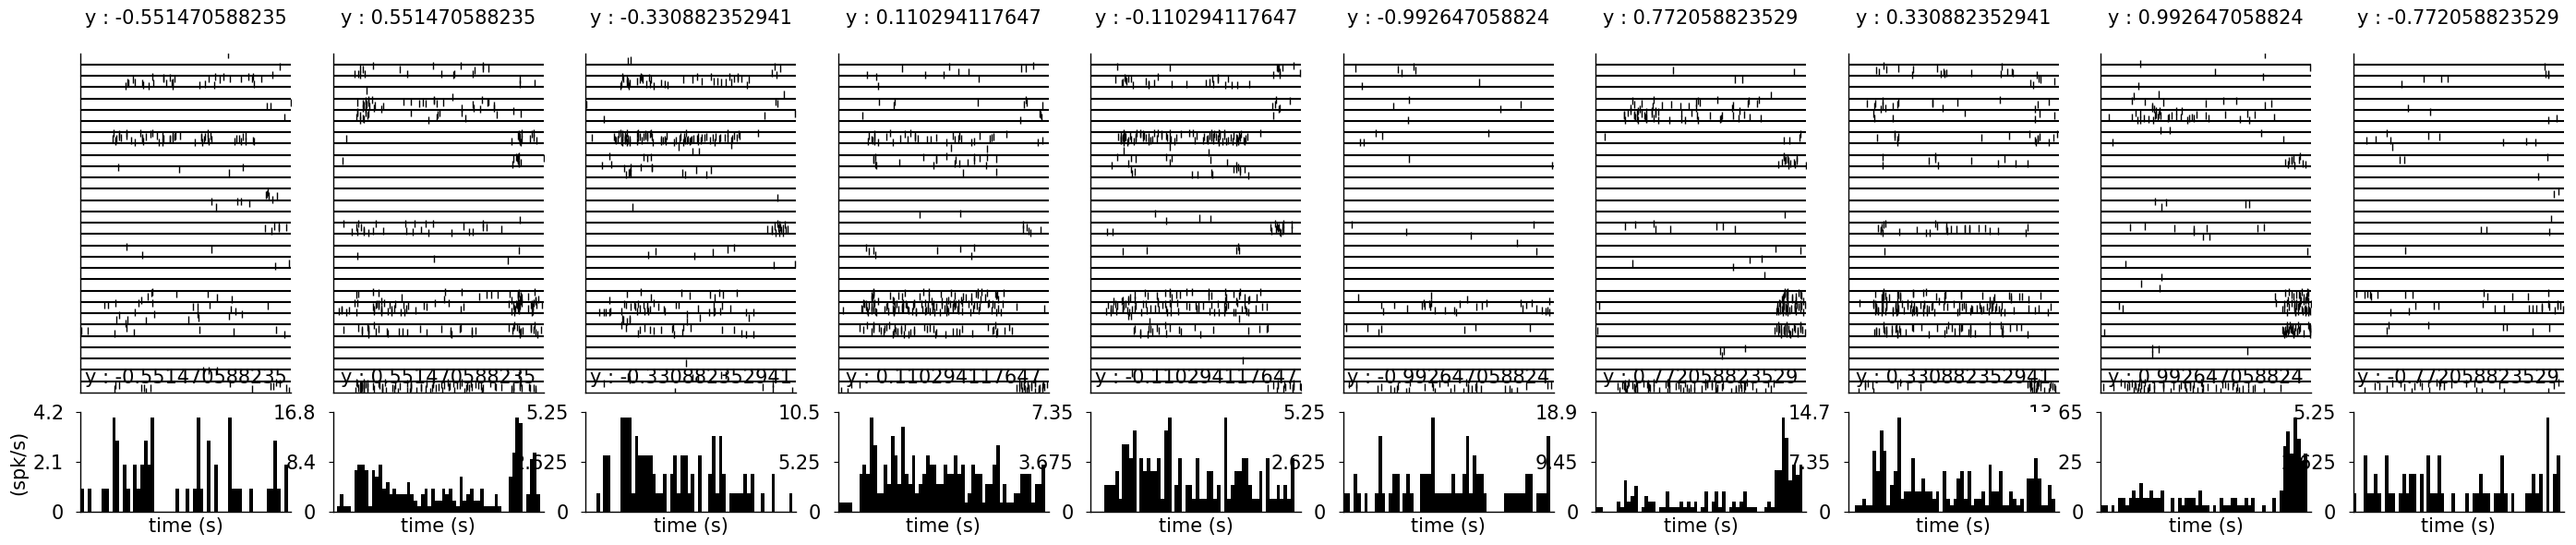

In [5]:
dsv = param_filter_query(data_store,st_name=['FlashedBar'],st_relative_luminance=1,st_y=[0.55147058823529393479,0.11029411764705887578,-0.77205882352941168634,0.99264705882352943789,-0.55147058823529415683,0.77205882352941168634,0.33088235294117662733,-0.33088235294117662733,-0.99264705882352943789,-0.11029411764705887578])    
RasterPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4', 'neurons' : analog_ids.tolist(), 'trial_averaged_histogram' : True, 'spontaneous' : False}),fig_param={'dpi' : 100,'figsize': (28,6)}).plot()



  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
RasterPlot plotting took: 20.9517011642seconds


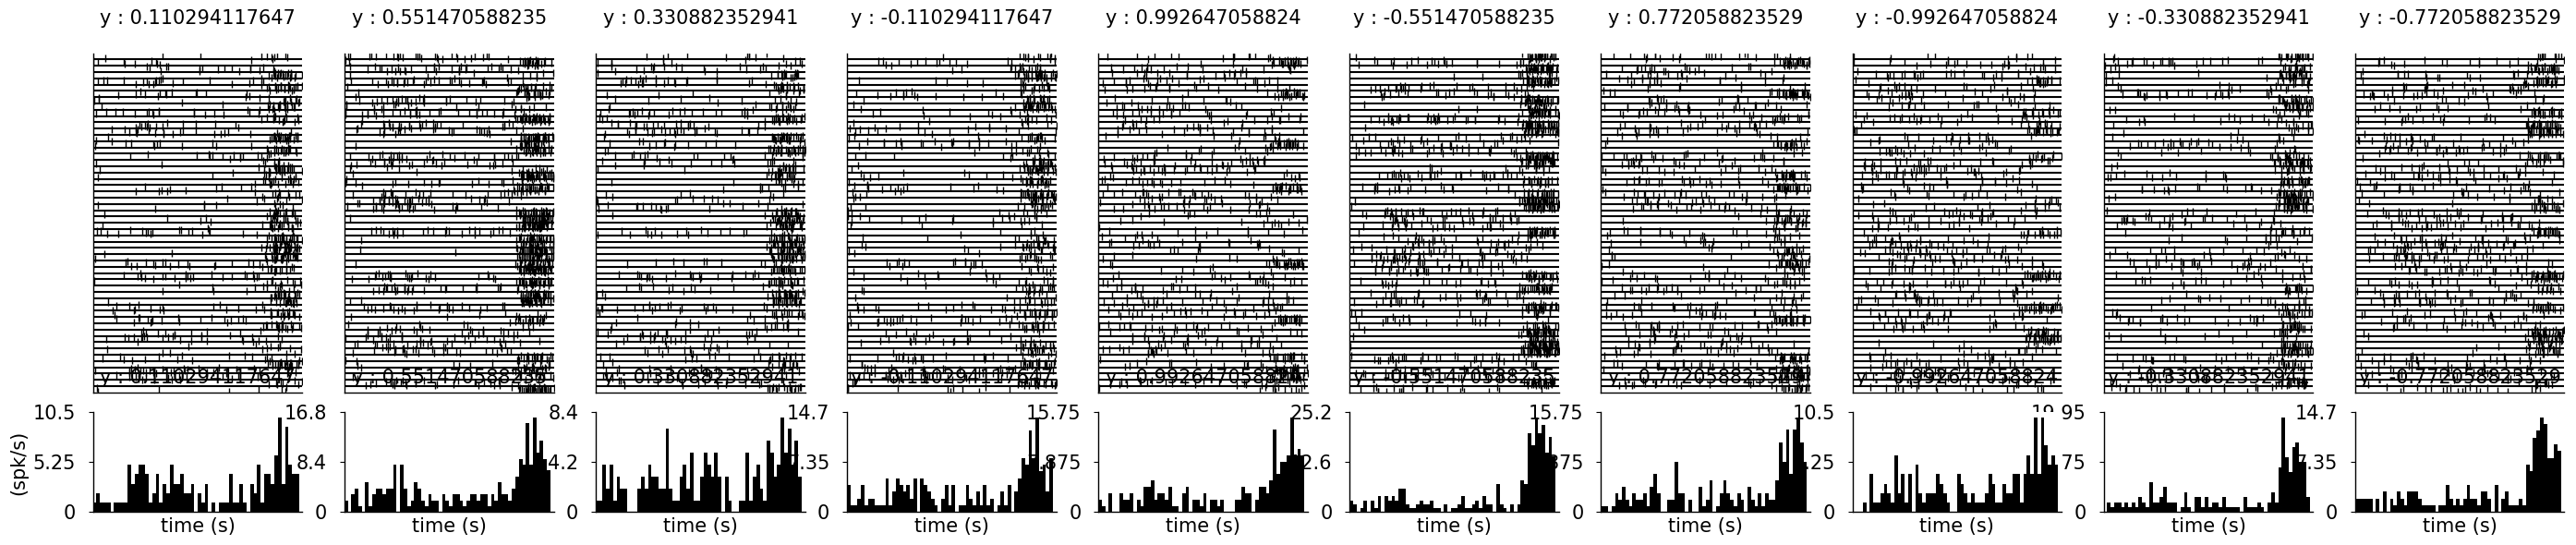

In [6]:
dsv = param_filter_query(data_store,st_name=['FlashedBar'],st_relative_luminance=1,st_y=[0.55147058823529393479,0.11029411764705887578,-0.77205882352941168634,0.99264705882352943789,-0.55147058823529415683,0.77205882352941168634,0.33088235294117662733,-0.33088235294117662733,-0.99264705882352943789,-0.11029411764705887578])    
RasterPlot(dsv,ParameterSet({'sheet_name' : 'X_OFF', 'neurons' : lgn_off_ids, 'trial_averaged_histogram' : True, 'spontaneous' : False}),fig_param={'dpi' : 100,'figsize': (28,6)}).plot()


  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
  0.3
  0.005
RasterPlot plotting took: 22.1371548176seconds


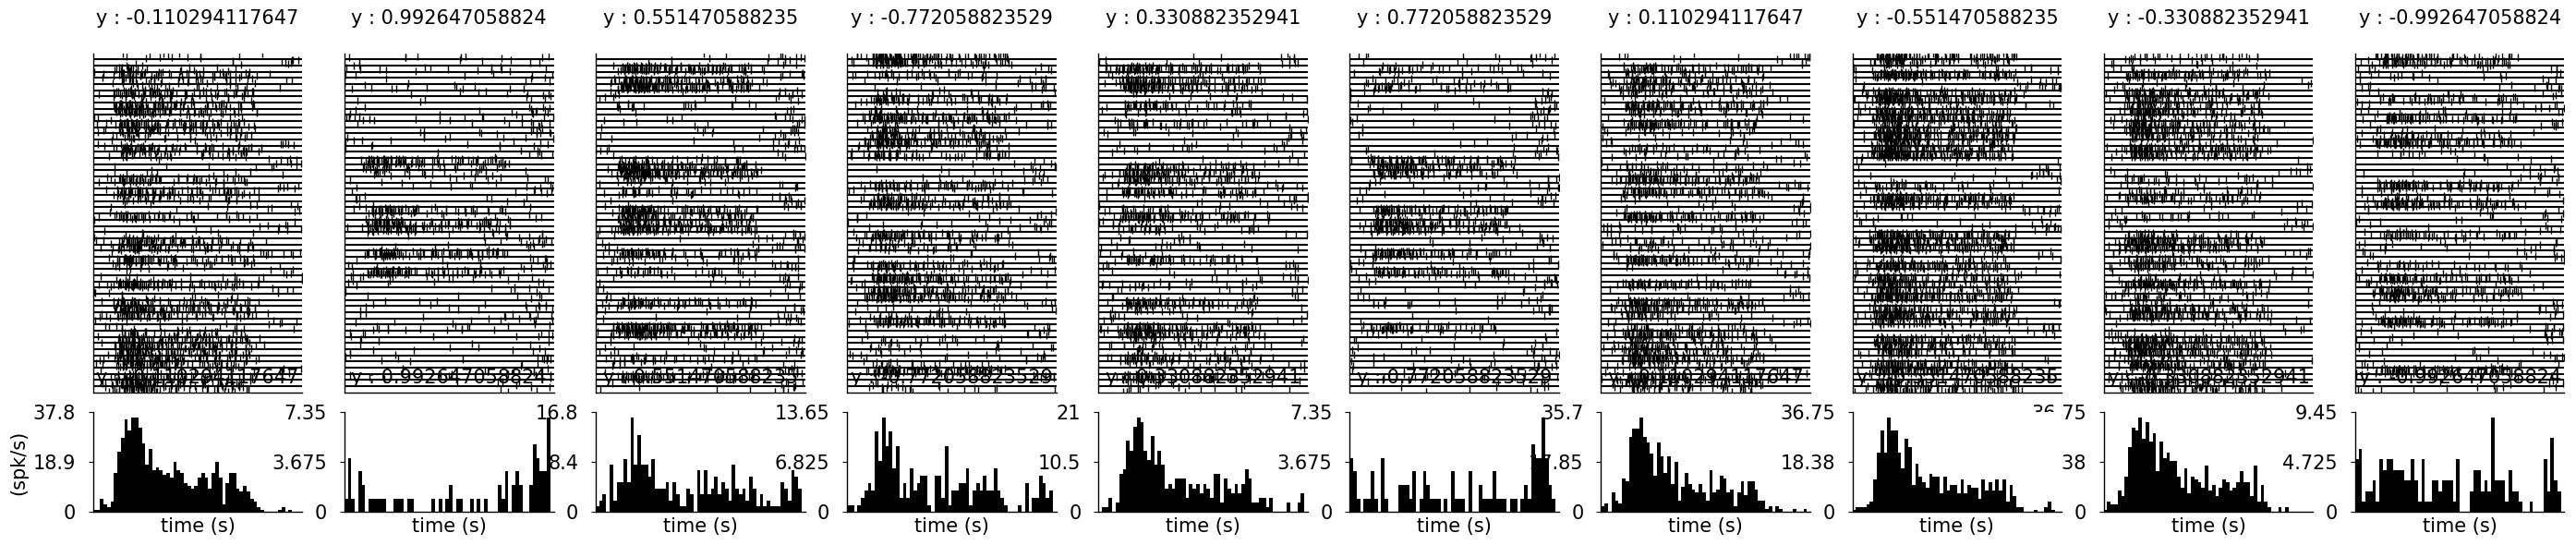

In [7]:
dsv = param_filter_query(data_store,st_name=['FlashedBar'],st_relative_luminance=1,st_y=[0.55147058823529393479,0.11029411764705887578,-0.77205882352941168634,0.99264705882352943789,-0.55147058823529415683,0.77205882352941168634,0.33088235294117662733,-0.33088235294117662733,-0.99264705882352943789,-0.11029411764705887578])    
RasterPlot(dsv,ParameterSet({'sheet_name' : 'X_ON', 'neurons' : lgn_on_ids, 'trial_averaged_histogram' : True, 'spontaneous' : False}),fig_param={'dpi' : 100,'figsize': (28,6)}).plot()


PlotTemporalTuningCurve plotting took: 0.229167938232seconds
PlotTemporalTuningCurve plotting took: 0.229167938232seconds
PlotTemporalTuningCurve plotting took: 0.229167938232seconds
PlotTemporalTuningCurve plotting took: 0.224764108658seconds
PlotTemporalTuningCurve plotting took: 0.224764108658seconds
PlotTemporalTuningCurve plotting took: 0.224764108658seconds


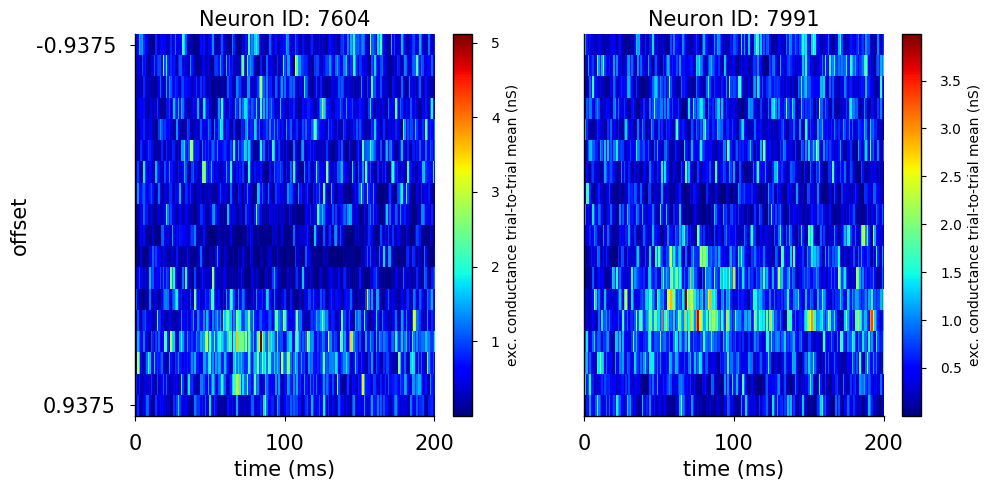

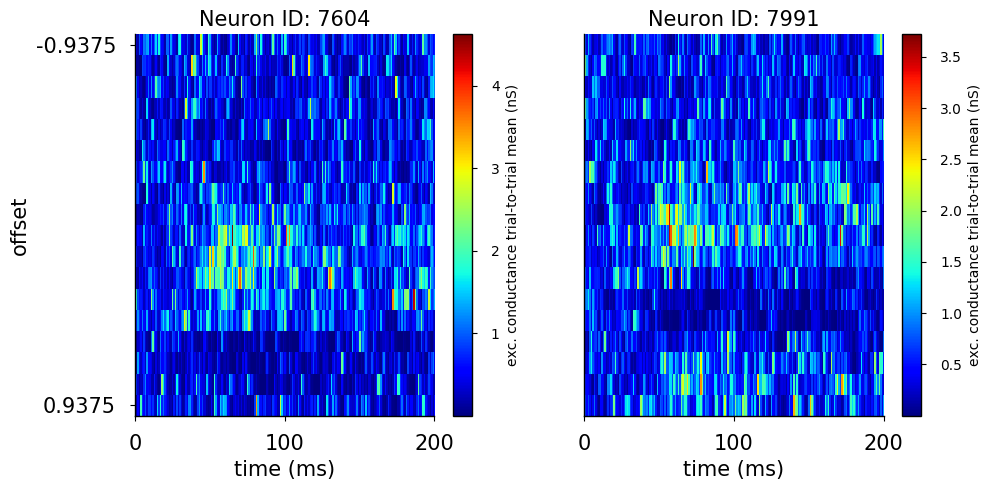

In [32]:
reload(mozaik.visualization.plotting)

dsv = queries.param_filter_query(data_store,st_name='FlashedBar',y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name = 'V1_Exc_L4',analysis_algorithm='TrialMean',st_relative_luminance=1)
mozaik.visualization.plotting.PlotTemporalTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': [7604,7991], 'sheet_name' : 'V1_Exc_L4','mean' : False}),fig_param={'dpi' : 100,'figsize': (10,5)},plot_file_name='AnalogSignalEvolutionOnBar1.png').plot({'*.interpolation' : 'none', '*.x_lim'  :(0,200),'*.y_label'  : 'offset'})

dsv = queries.param_filter_query(data_store,st_name='FlashedBar',y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name = 'V1_Exc_L4',analysis_algorithm='TrialMean',st_relative_luminance=0)
mozaik.visualization.plotting.PlotTemporalTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': [7604,7991], 'sheet_name' : 'V1_Exc_L4','mean' : False}),fig_param={'dpi' : 100,'figsize': (10,5)},plot_file_name='AnalogSignalEvolutionOnBar1.png').plot({'*.interpolation' : 'none','*.x_lim'  :(0,200),'*.y_label'  : 'offset'})



ConnectivityPlot plotting took: 0.662457942963seconds
ConnectivityPlot plotting took: 0.662457942963seconds


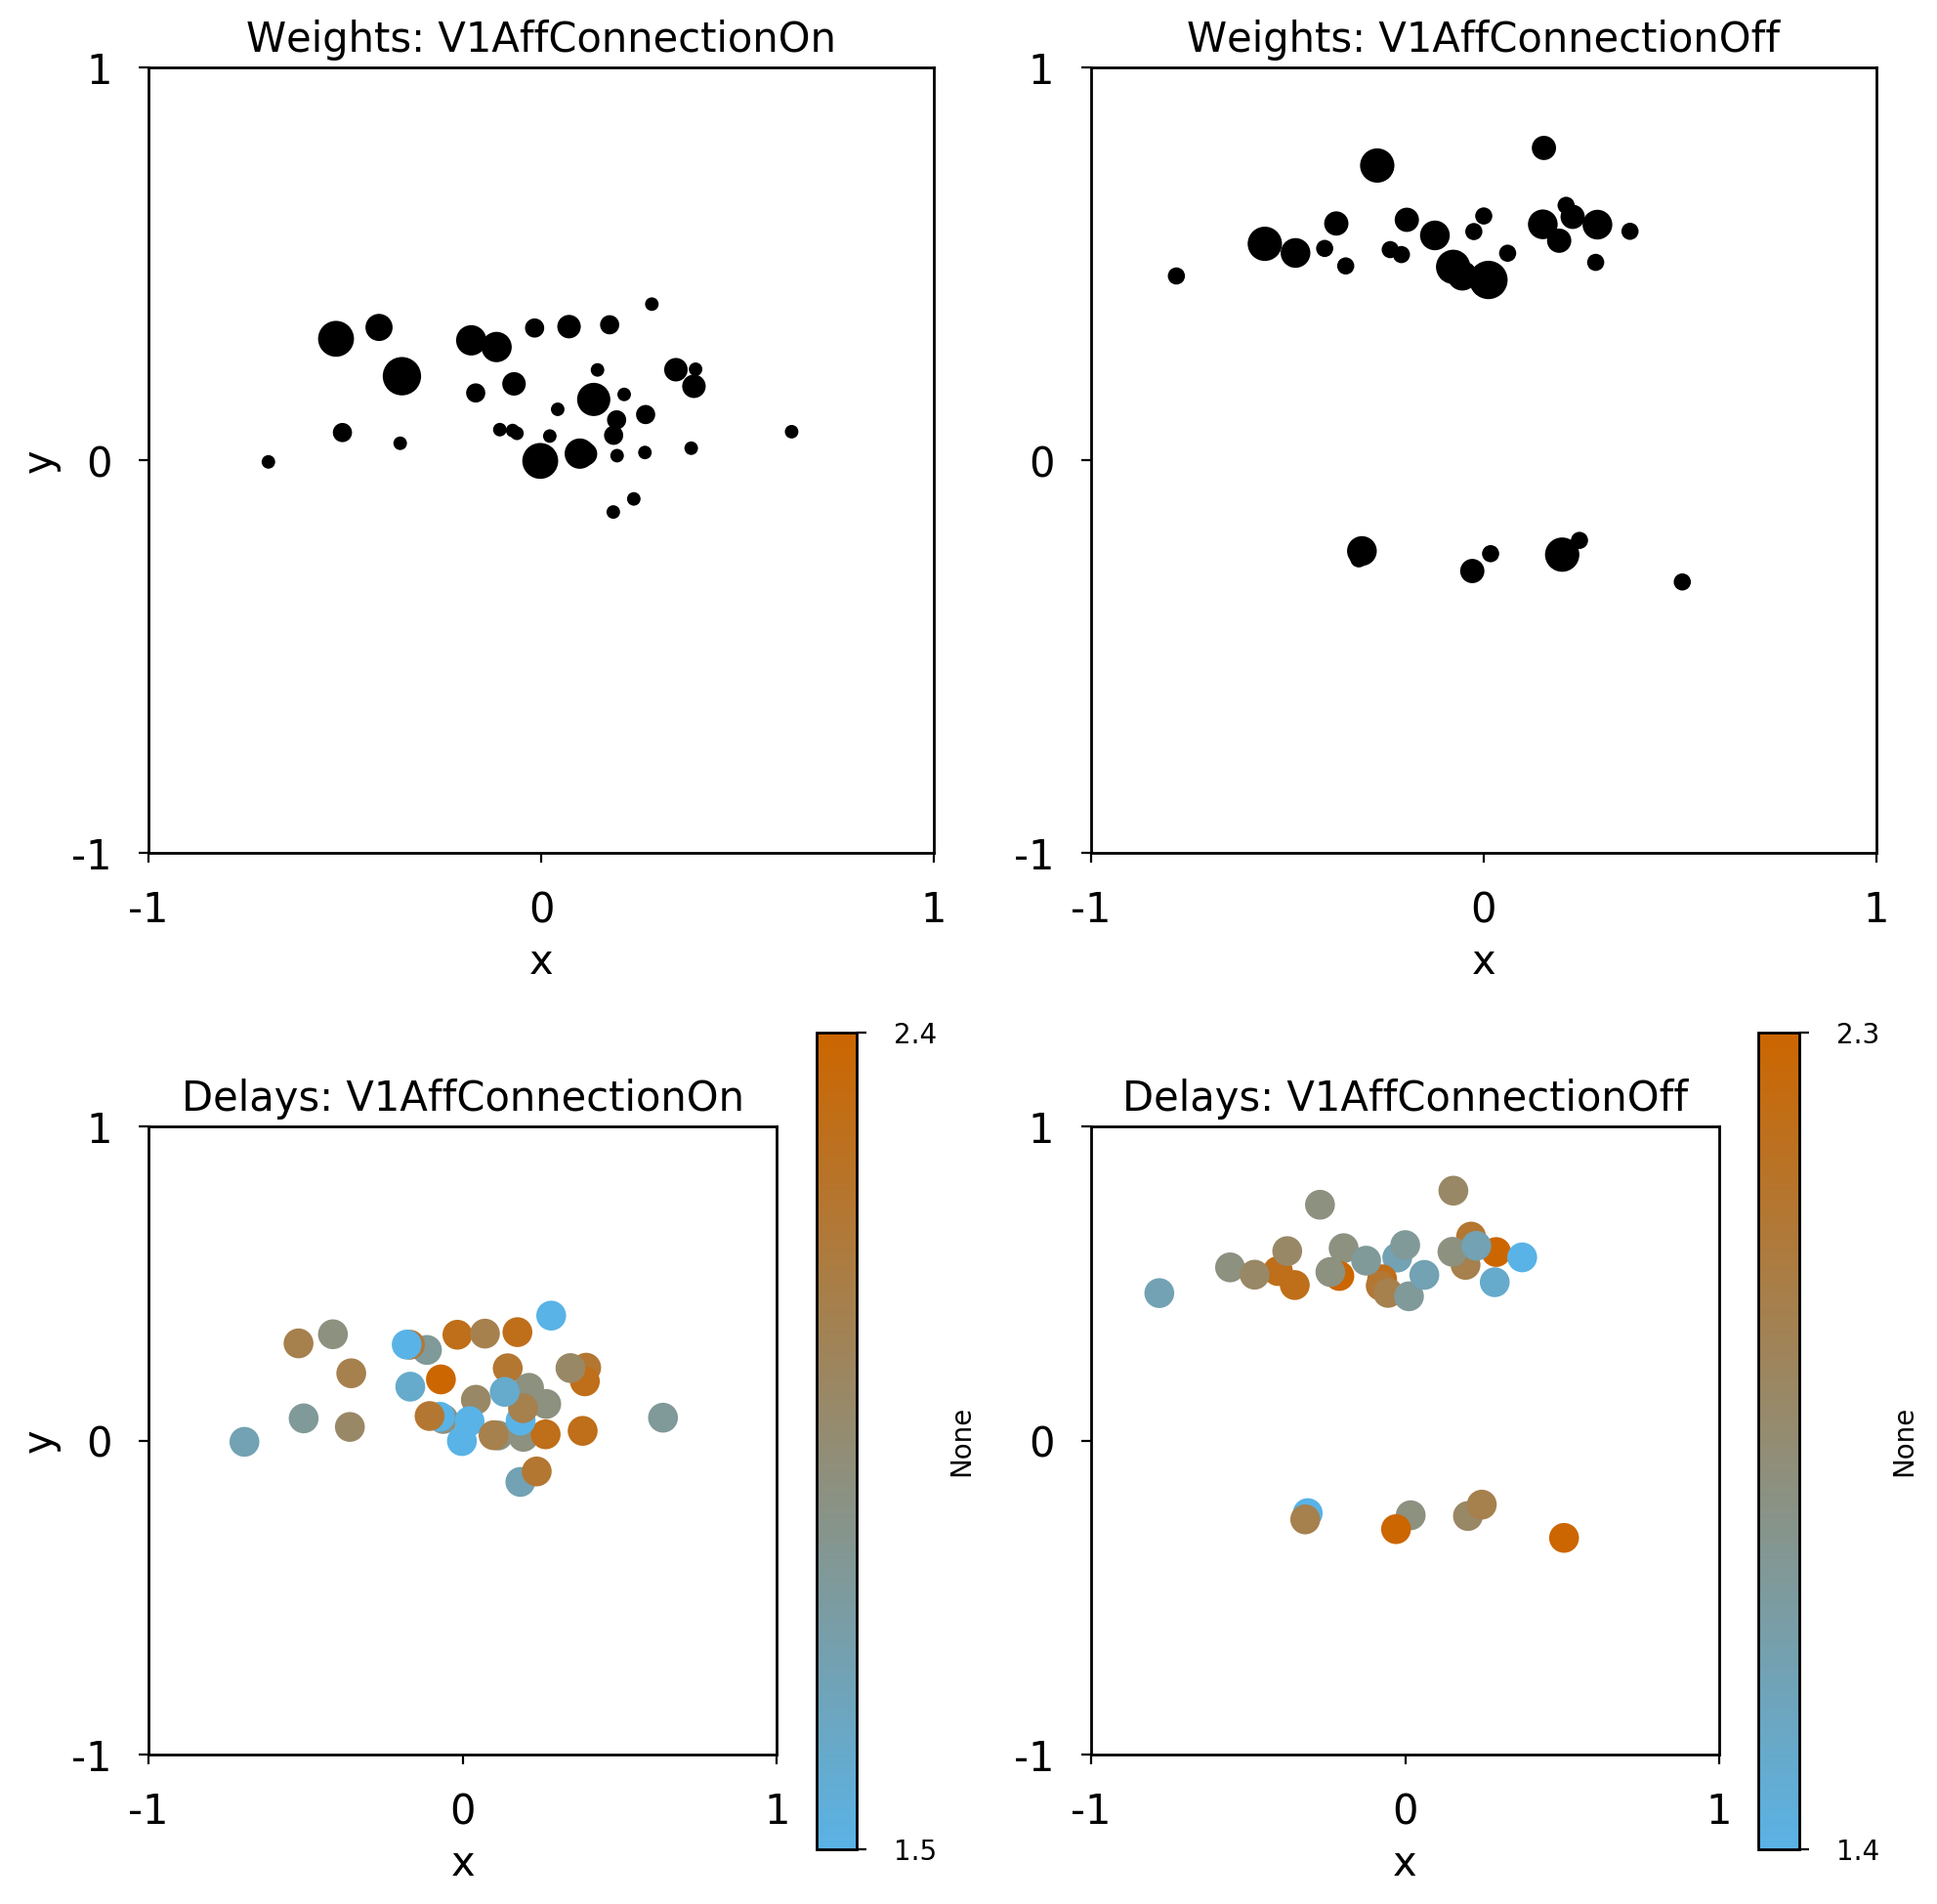

In [28]:
%matplotlib inline
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation',sheet_name='V1_Exc_L4')
mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : l4_exc_or_many_analog[0], 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 200,'figsize': (10,10)}).plot()


In [21]:
queries.param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean').print_content()
AnalogSignal_PerNeuronMeanVar(queries.param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean'),ParameterSet({})).analyse()

  DSV info:
  DSV info:
     Number of recordings: 0
     Number of recordings: 0
     Number of ADS: 0
     Number of ADS: 0
  Starting AnalogSignal_PerNeuronMeanVar analysis
  Starting AnalogSignal_PerNeuronMeanVar analysis
AnalogSignal_PerNeuronMeanVar analysis took: 0.00132203102112seconds
AnalogSignal_PerNeuronMeanVar analysis took: 0.00132203102112seconds


AnalogSignalListPlot plotting took: 0.109561920166seconds
AnalogSignalListPlot plotting took: 0.0797319412231seconds
AnalogSignalListPlot plotting took: 0.0824871063232seconds
AnalogSignalListPlot plotting took: 0.0895411968231seconds
AnalogSignalListPlot plotting took: 0.0802328586578seconds
AnalogSignalListPlot plotting took: 0.0950138568878seconds


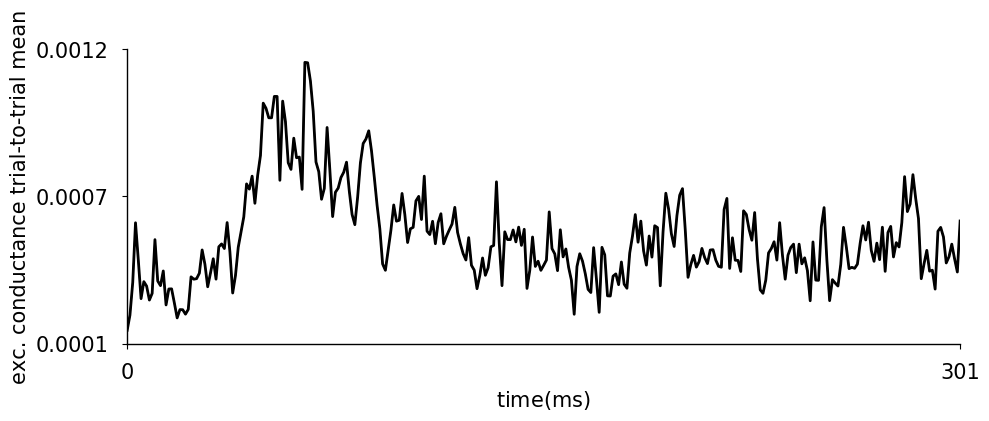

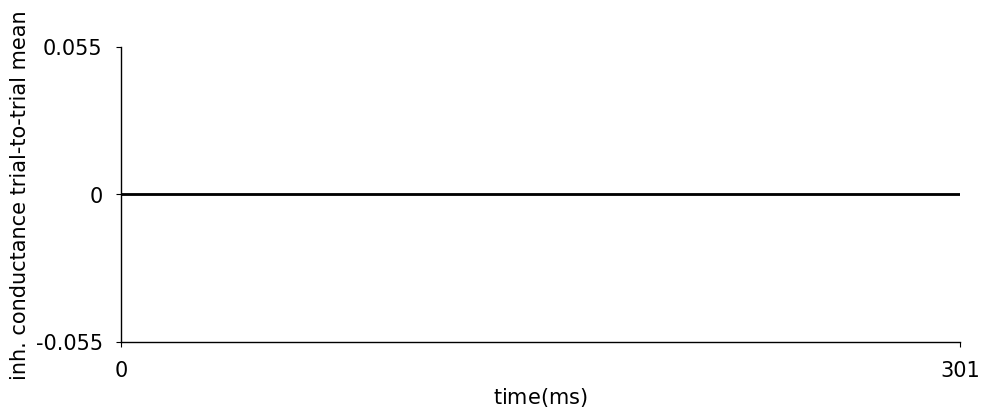

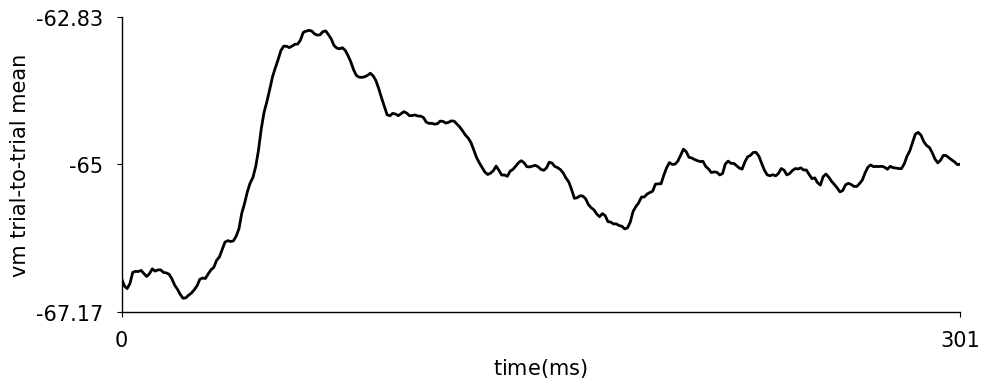

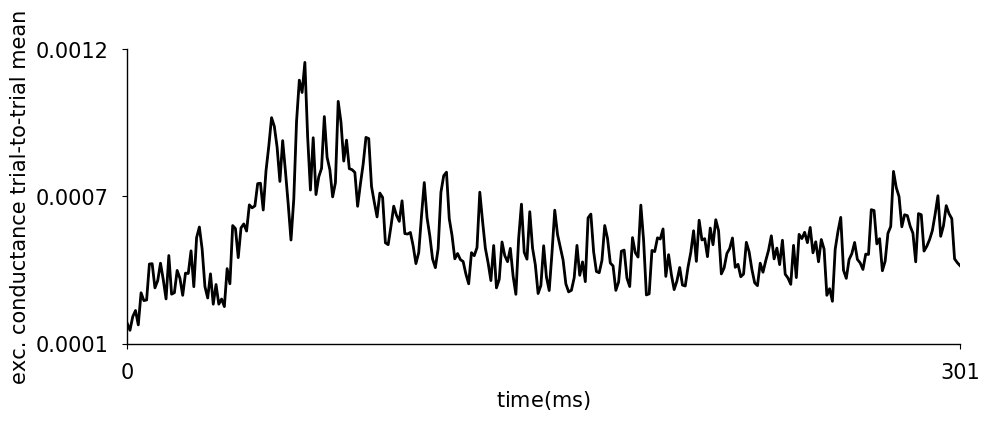

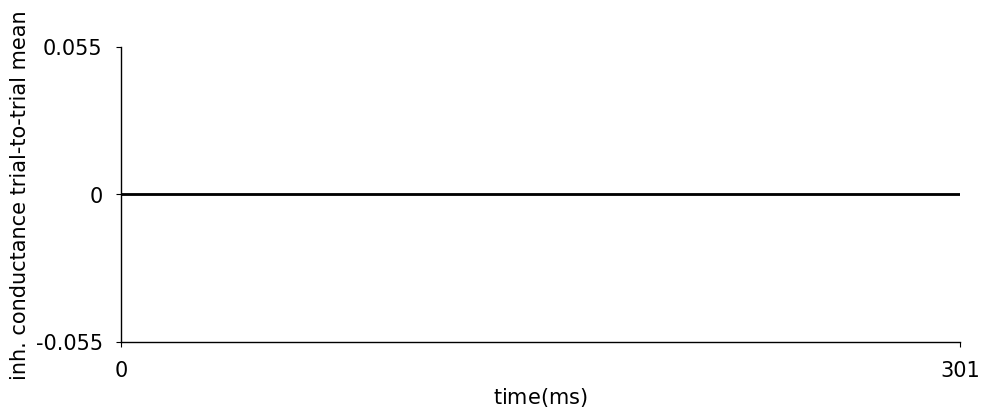

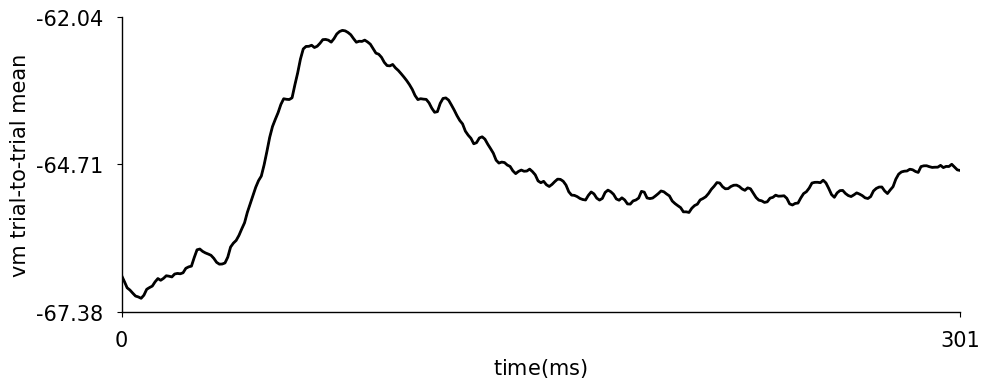

In [25]:
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=1.0,y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanExcCondON.png').plot()
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=1.0,y_axis_name=['inh. conductance trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanInhCondON.png').plot()
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=1.0,y_axis_name=['vm trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanVmON.png').plot()

dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=0.0,y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanExcCondOFF.png').plot()
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=0.0,y_axis_name=['inh. conductance trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanInhCondOFF.png').plot()
dsv = param_filter_query(data_store,st_name='FlashedBar',analysis_algorithm='TrialMean',st_relative_luminance=0.0,y_axis_name=['vm trial-to-trial mean'],sheet_name='V1_Exc_L4',st_y=0.33088235294117662733)
mozaik.visualization.plotting.AnalogSignalListPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4','neurons' : analog_ids.tolist(), 'mean' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='BarMeanVmOFF.png').plot()



In [33]:
dsv = queries.param_filter_query(data_store,value_name=['PerNeuronMean(exc. conductance trial-to-trial mean)'],st_name='FlashedBar',sheet_name = 'V1_Exc_L4')
PlotTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': list(analog_ids[:10]), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False,'pool' : False,'polar' : False}),fig_param={'dpi' : 100,'figsize': (25,5)}).plot({'*.colors':['black','blue']})
dsv = queries.param_filter_query(data_store,value_name=['PerNeuronMean(exc. conductance trial-to-trial mean)'],st_name='FlashedBar',sheet_name = 'V1_Exc_L4')
PlotTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': list(analog_ids[:10]), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False,'pool' : False,'polar' : False}),fig_param={'dpi' : 100,'figsize': (25,5)}).plot({'*.colors':['black','blue']})


TypeError: unbound method __init__() must be called with Plotting instance as first argument (got PlotTuningCurve instance instead)

In [260]:
dsv = queries.param_filter_query(data_store,value_name=['PerNeuronMean(vm trial-to-trial mean)'],st_name='FlashedBar',sheet_name = 'V1_Exc_L4')
PlotTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': list(analog_ids[:10]), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False,'pool' : False,'polar' : False}),fig_param={'dpi' : 100,'figsize': (25,5)}).plot({'*.colors':['black','blue']})



PlotTuningCurve plotting took: 0.00321888923645seconds


<Figure size 2500x500 with 0 Axes>

In [ ]:
5170 


OverviewPlot plotting took: 0.903383970261seconds
OverviewPlot plotting took: 0.903383970261seconds


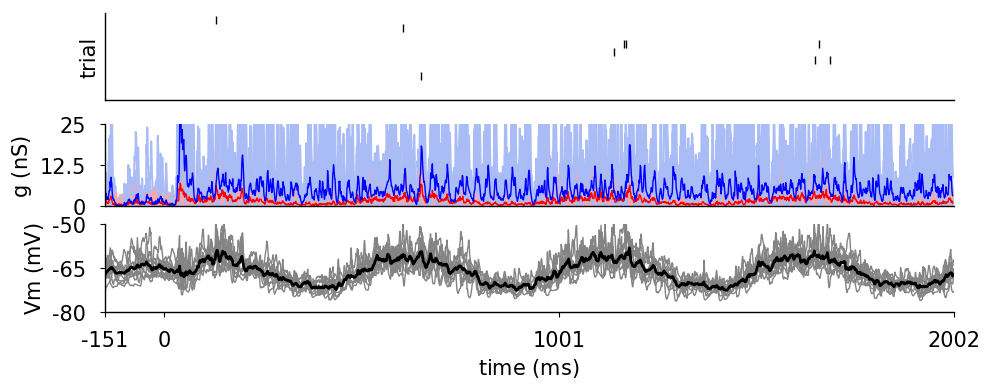

In [13]:
reload(mozaik.visualization.simple_plot)
reload(mozaik.visualization.plotting)

dsv = param_filter_query(data_store,st_name=['FullfieldDriftingSinusoidalGrating'],st_orientation=[0.0],st_contrast=100)
mozaik.visualization.plotting.OverviewPlot(dsv,ParameterSet({'sheet_name' : 'V1_Exc_L4', 'neuron' : 2954 , 'sheet_activity' : {}, 'spontaneous' : True}),fig_param={'dpi' : 100,'figsize': (10,4)},plot_file_name='Overview_ExcL4_2954.eps').plot({'Conductance_plot.y_lim' : (0,25),'Vm_plot.y_lim' : (-80,-50)})


In [53]:
import os 

def save_data(dirname,dsv,name):
    try:
        os.mkdir(dirname)
    except:
        'all good'
        
    for neuron_id in analog_ids:
        mat_vm = []
        mat_exc = []
        mat_inh = []
        for seg in dsv.get_segments():
            sid = MozaikParametrized.idd(seg.annotations['stimulus'])
            a = seg.get_vm(neuron_id).magnitude
            a= numpy.insert(a,0,sid.trial)
            a= numpy.insert(a,0,sid.y)
            mat_vm.append(a)
            
            a = seg.get_esyn(neuron_id).magnitude
            a= numpy.insert(a,0,sid.trial)
            a= numpy.insert(a,0,sid.y)
            mat_exc.append(a)

            a = seg.get_isyn(neuron_id).magnitude
            a= numpy.insert(a,0,sid.trial)
            a= numpy.insert(a,0,sid.y)
            mat_inh.append(a)

            
        numpy.savetxt(dirname+'/'+'VM_' + name+str(neuron_id)+'.csv',numpy.array(mat_vm))
        numpy.savetxt(dirname+'/'+'ExcC' + name+str(neuron_id)+'.csv',numpy.array(mat_exc))
        numpy.savetxt(dirname+'/'+'InhC' + name+str(neuron_id)+'.csv',numpy.array(mat_inh))

        
d = 'random_and_fast_afferent_delay_sd=70_weakerinh'
dsv = param_filter_query(data_store,st_name='FlashedBar',sheet_name='V1_Exc_L4',st_relative_luminance=0)    
save_data('/home/antolikjan/Dropbox/ForMorgan/'+d,dsv,'Dark_')
dsv = param_filter_query(data_store,st_name='FlashedBar',sheet_name='V1_Exc_L4',st_relative_luminance=1.0)    
save_data('/home/antolikjan/Dropbox/ForMorgan/'+d,dsv,'Bright_')


In [6]:
Kremkow_plots.OrientationTuningSummary(data_store,ParameterSet({'exc_sheet_name': 'V1_Exc_L4','inh_sheet_name': 'V1_Inh_L4'}),fig_param={'dpi' : 100,'figsize': (15,9)},plot_file_name='OrientationTuningSummaryL4.png').plot()            



ValueError: At least 2 DSVs have to be provided

<Figure size 1500x900 with 0 Axes>

In [47]:
import mozaik.analysis.analysis
reload(mozaik.analysis.analysis)
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',analysis_algorithm='TrialAveragedFiringRate',value_name='Firing rate',sheet_name=['V1_Exc_L4','V1_Inh_L4'])    
mozaik.analysis.analysis.GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()


  Starting GaussianTuningCurveFit analysis
  ['{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', '{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}']


{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":'FullfieldDriftingSinusoidalGrating', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}


{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":'FullfieldDriftingSinusoidalGrating', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}


GaussianTuningCurveFit analysis took: 0.859328985214seconds


(array([ 1.,  3.,  5.,  3.,  1.,  8.,  2.,  2.,  3.,  1.]),
 array([ -9.43397379,  -7.27499466,  -5.11601553,  -2.9570364 ,
         -0.79805728,   1.36092185,   3.51990098,   5.67888011,
          7.83785924,   9.99683837,  12.1558175 ]),
 <a list of 10 Patch objects>)

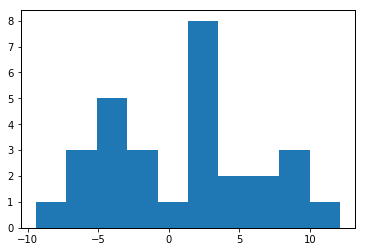

In [25]:
pylab.hist((a-b)[abs(a-b)<1000])

In [21]:
# Analysis of exc and inh tuning
TrialAveragedFiringRate(param_filter_query(data_store,sheet_name='V1_Inh_L4',st_name='FullfieldDriftingSinusoidalGrating'),ParameterSet({})).analyse()
TrialAveragedFiringRate(param_filter_query(data_store,sheet_name='V1_Exc_L4',st_name='InternalStimulus'),ParameterSet({})).analyse()
TrialAveragedFiringRate(param_filter_query(data_store,sheet_name='V1_Inh_L4',st_name='InternalStimulus'),ParameterSet({})).analyse()

dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',sheet_name=['V1_Exc_L4'],st_contrast=100)
Analog_F0andF1(dsv,ParameterSet({})).analyse()

dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',value_name='Firing rate',sheet_name='V1_Inh_L4',st_contrast=100)    
GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()


dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',value_name='F1_Exc_Cond',sheet_name='V1_Exc_L4',st_contrast=100)    
GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',value_name='F1_Inh_Cond',sheet_name='V1_Exc_L4',st_contrast=100)    
GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',value_name='F0_Exc_Cond',sheet_name='V1_Exc_L4',st_contrast=100)    
GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()
dsv = param_filter_query(data_store,st_name='FullfieldDriftingSinusoidalGrating',value_name='F0_Inh_Cond',sheet_name='V1_Exc_L4',st_contrast=100)    
GaussianTuningCurveFit(dsv,ParameterSet({'parameter_name' : 'orientation'})).analyse()

  Starting TrialAveragedFiringRate analysis
  (16, 120)
  (16, 120)
TrialAveragedFiringRate analysis took: 38.6013560295seconds
  Starting TrialAveragedFiringRate analysis
  (1, 170)
  (1, 170)
TrialAveragedFiringRate analysis took: 0.295686006546seconds
  Starting TrialAveragedFiringRate analysis
  (1, 120)
  (1, 120)
TrialAveragedFiringRate analysis took: 0.481054067612seconds
  Starting Analog_F0andF1 analysis
Analog_F0andF1 analysis took: 29.593681097seconds
  Starting GaussianTuningCurveFit analysis
  ['{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}']
GaussianTuningCurveFit analysis took: 0.132701873779seconds


{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":'FullfieldDriftingSinusoidalGrating', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}


  Starting GaussianTuningCurveFit analysis
  ['{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}']
GaussianTuningCurveFit analysis took: 0.0526940822601seconds


{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":'FullfieldDriftingSinusoidalGrating', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}


  Starting GaussianTuningCurveFit analysis
  ['{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}']
GaussianTuningCurveFit analysis took: 0.129257917404seconds


{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":'FullfieldDriftingSinusoidalGrating', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}


  Starting GaussianTuningCurveFit analysis
  ['{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}']
GaussianTuningCurveFit analysis took: 0.0489649772644seconds


{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":'FullfieldDriftingSinusoidalGrating', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}


  Starting GaussianTuningCurveFit analysis
  ['{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":\'FullfieldDriftingSinusoidalGrating\', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}']
GaussianTuningCurveFit analysis took: 0.0473411083221seconds


{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":2002, "frame_duration":7.0, "location_x":0.0, "location_y":0.0, "name":'FullfieldDriftingSinusoidalGrating', "orientation":None, "size_x":8.0, "size_y":8.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}


  Starting GaussianTuningCurveFit analysis
GaussianTuningCurveFit analysis took: 0.00177407264709seconds


In [22]:
or_pref_F0_Exc_L4 = queries.param_filter_query(data_store,value_name=['orientation preference of F0_Exc_Cond'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]
or_pref_F0_Inh_L4 = queries.param_filter_query(data_store,value_name=['orientation preference of F0_Inh_Cond'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]
or_hwhh_F0_Exc_L4 = queries.param_filter_query(data_store,value_name=['orientation HWHH of F0_Exc_Cond'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]
or_hwhh_F0_Inh_L4 = queries.param_filter_query(data_store,value_name=['orientation HWHH of F0_Inh_Cond'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]

or_pref_F1_Exc_L4 = queries.param_filter_query(data_store,value_name=['orientation preference of F1_Exc_Cond'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]
or_pref_F1_Inh_L4 = queries.param_filter_query(data_store,value_name=['orientation preference of F1_Inh_Cond'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]
or_hwhh_F1_Exc_L4 = queries.param_filter_query(data_store,value_name=['orientation HWHH of F1_Exc_Cond'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]
or_hwhh_F1_Inh_L4 = queries.param_filter_query(data_store,value_name=['orientation HWHH of F1_Inh_Cond'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]

l4_ids = or_pref_F1_Exc_L4.ids
or_pref_L4 = queries.param_filter_query(data_store,value_name=['orientation preference of Firing rate'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]
or_err_L4 = queries.param_filter_query(data_store,value_name=['orientation fitting error of Firing rate'],sheet_name=["V1_Exc_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]
l4_ids = numpy.array(l4_ids)[numpy.array(or_err_L4.get_value_by_id(l4_ids))<0.3]

or_pref_F1_Exc_L4 = circular_dist(numpy.array(or_pref_F1_Exc_L4.get_value_by_id(l4_ids)),numpy.array(or_pref_L4.get_value_by_id(l4_ids)),numpy.pi)
or_pref_F1_Inh_L4 = circular_dist(numpy.array(or_pref_F1_Inh_L4.get_value_by_id(l4_ids)),numpy.array(or_pref_L4.get_value_by_id(l4_ids)),numpy.pi)
or_pref_F0_Exc_L4 = circular_dist(numpy.array(or_pref_F0_Exc_L4.get_value_by_id(l4_ids)),numpy.array(or_pref_L4.get_value_by_id(l4_ids)),numpy.pi)
or_pref_F0_Inh_L4 = circular_dist(numpy.array(or_pref_F0_Inh_L4.get_value_by_id(l4_ids)),numpy.array(or_pref_L4.get_value_by_id(l4_ids)),numpy.pi)


In [87]:
print or_hwhh_F0_Exc_L4.get_value_by_id(l4_ids)

[55.60093357655564, 43.502533134497426, 59.153781582894126, 67.668878462945202, 47.492947442208035, 52.15532782763556, 51.342551910187275, 38.962826898552699, 42.799873541169866, 51.160529454885378, 45.256568709102844, 46.118928099223218, 46.648176530718175, 49.814966293993074, 46.690074211818839, 43.255564779952714, 56.580237704277401, 49.442054493071865, 49.593123850489725, 51.3741898635963, 54.540226457467249, 44.895691725422658, 40.77688673053872, 46.518252438271531]


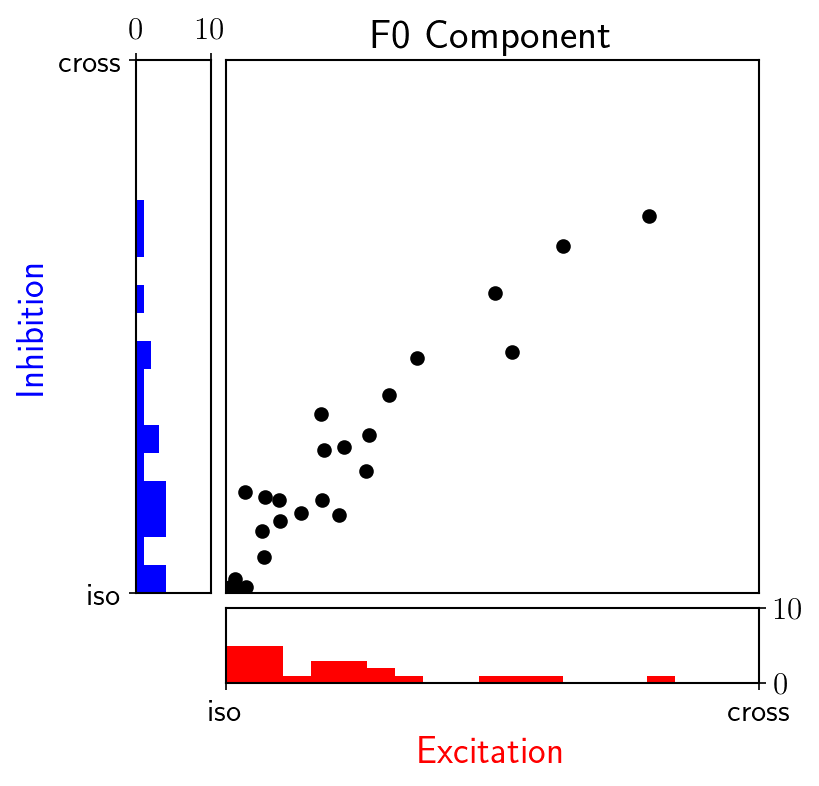

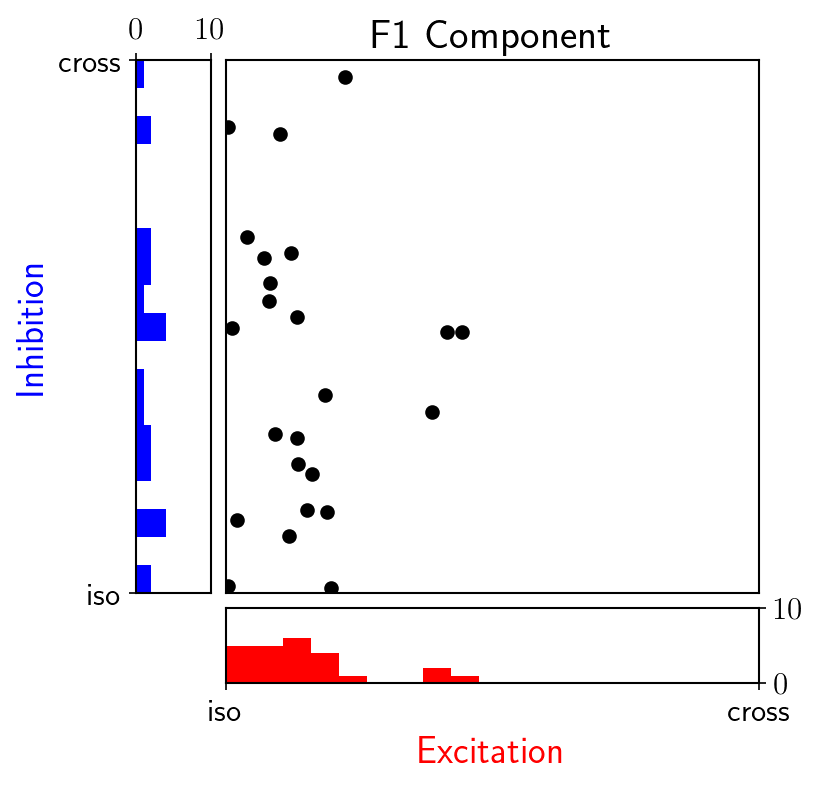

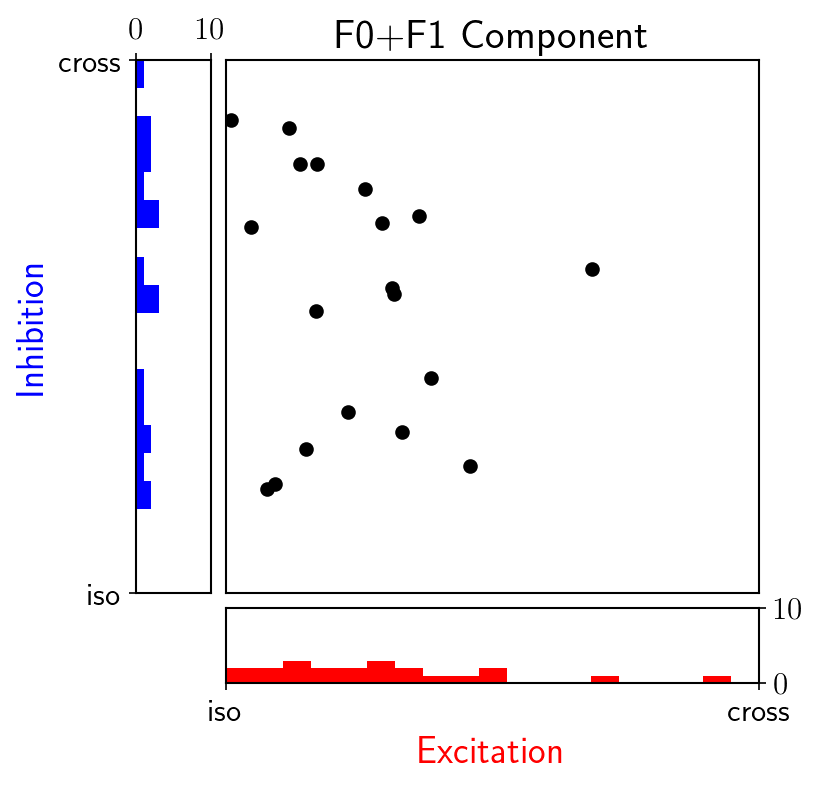

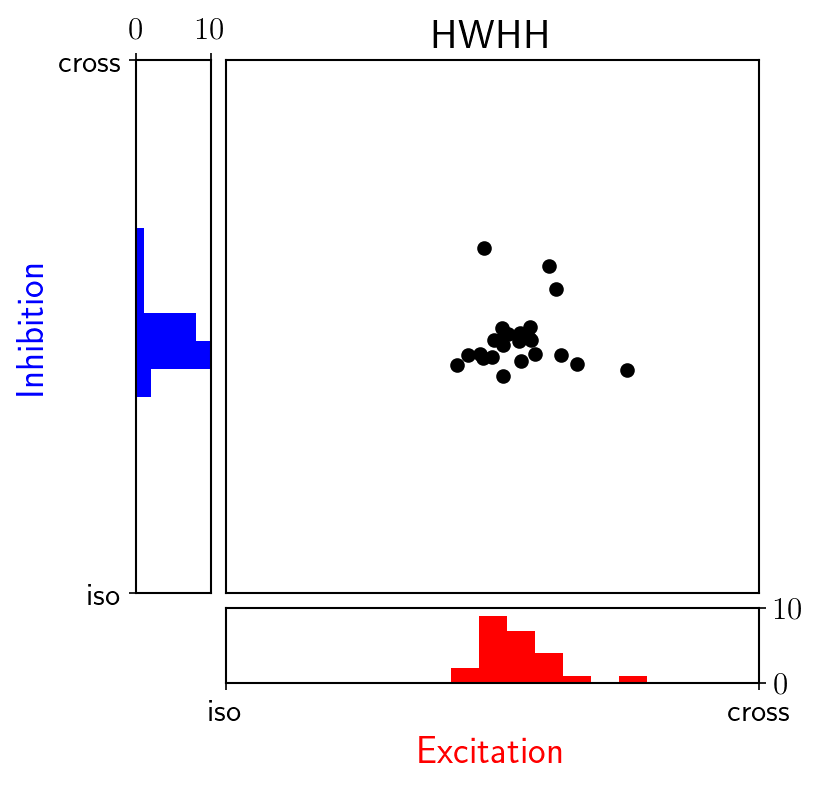

In [23]:
matplotlib.rcParams['text.usetex'] = True
from mpl_toolkits.axes_grid1 import make_axes_locatable

def cond_plot(exc,inh,title):

    
    #pylab.figure(dpi=150)
    fig, axScatter = pylab.subplots(figsize=(5.5, 5.5),dpi=150)
    pylab.title(title,fontsize=20)
    pylab.plot(exc,inh,'ok')
    axScatter.set_aspect(1.)
    #ylab.xlim(0,numpy.pi/2)
    #ylab.ylim(0,numpy.pi/2)
    #axScatter.set_xticks([0,numpy.pi/2],[r'0$^\circ$',r'90$^\circ$'])
    #axScatter.set_yticks([0,numpy.pi/2],[r'0$^\circ$',r'90$^\circ$'])
    #axScatter.set_xticklabels([r'0$^\circ$',r'90$^\circ$'])
    #axScatter.set_yticklabels([r'0$^\circ$',r'90$^\circ$'])
    axScatter.xaxis.set_tick_params(labelbottom=False)
    axScatter.yaxis.set_tick_params(labelleft=False)
    axScatter.xaxis.set_tick_params(tick1On=False)
    axScatter.yaxis.set_tick_params(tick1On=False)

    
    divider = make_axes_locatable(axScatter)
    axHistx = divider.append_axes("bottom", 0.5, pad=0.1, sharex=axScatter)
    axHisty = divider.append_axes("left", 0.5, pad=0.1, sharey=axScatter)
    
    axHistx.hist(exc, bins=numpy.linspace(0,numpy.pi/2,20),color='r')
    axHistx.set_xlabel('Excitation',fontsize=18)
    axHistx.xaxis.label.set_color('red')
    axHistx.set_xlim(0,numpy.pi/2)
    axHistx.set_ylim(0,10)
    axHistx.set_xticks([0,numpy.pi/2])
    axHistx.set_xticklabels(['iso','cross'])
        
    axHisty.hist(inh, bins=numpy.linspace(0,numpy.pi/2,20),orientation='horizontal',color='b')
    axHisty.set_ylabel('Inhibition',fontsize=18)
    axHisty.yaxis.label.set_color('blue')
    axHisty.set_xlim(0,10)
    axHisty.set_ylim(0,numpy.pi/2)
    axHisty.set_yticks([0,numpy.pi/2])
    axHisty.set_yticklabels(['iso','cross'])
    
    axHistx.tick_params(axis='both', which='major', labelsize=15)
    axHisty.tick_params(axis='both', which='major', labelsize=15)
    axHisty.xaxis.tick_top()
    axHistx.yaxis.tick_right()
    
    
cond_plot(or_pref_F0_Exc_L4,or_pref_F0_Inh_L4,'F0 Component')
cond_plot(or_pref_F1_Exc_L4,or_pref_F1_Inh_L4,'F1 Component')
cond_plot(or_pref_F0_Exc_L4+or_pref_F1_Exc_L4,or_pref_F0_Inh_L4+or_pref_F1_Inh_L4,'F0+F1 Component')
cond_plot(numpy.array(or_hwhh_F0_Exc_L4.get_value_by_id(l4_ids))/180*numpy.pi,numpy.array(or_hwhh_F0_Inh_L4.get_value_by_id(l4_ids))/180*numpy.pi,'HWHH')



#pylab.figure()
#pylab.plot(or_hwhh_F0_Exc_L4.get_value_by_id(l4_ids),or_hwhh_F0_Inh_L4.get_value_by_id(l4_ids),'o')
#pylab.gca().set_aspect('equal')
#pylab.xlim(0,90)
#pylab.ylim(0,90)




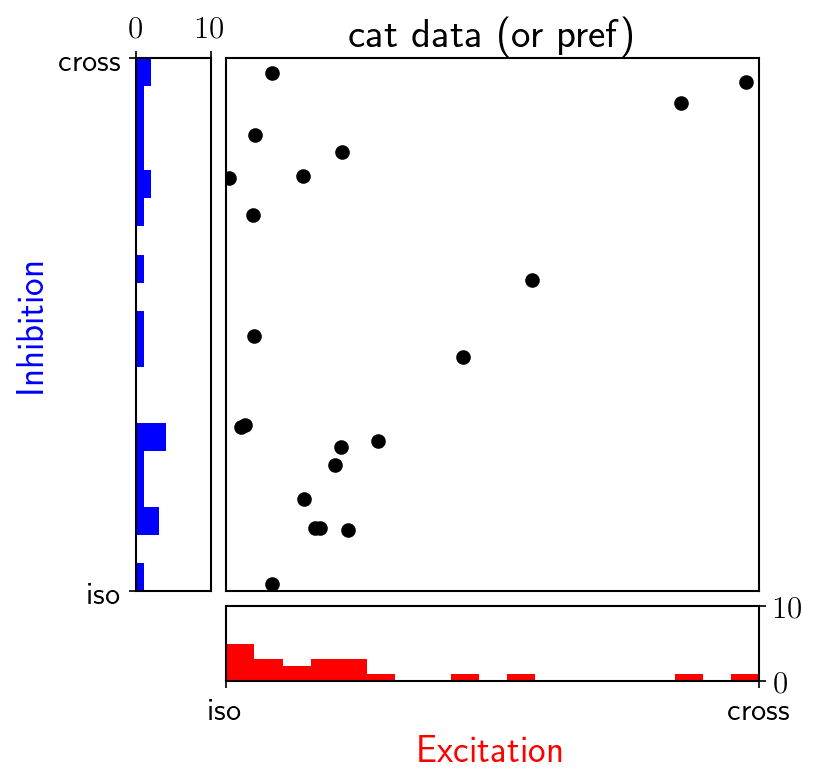

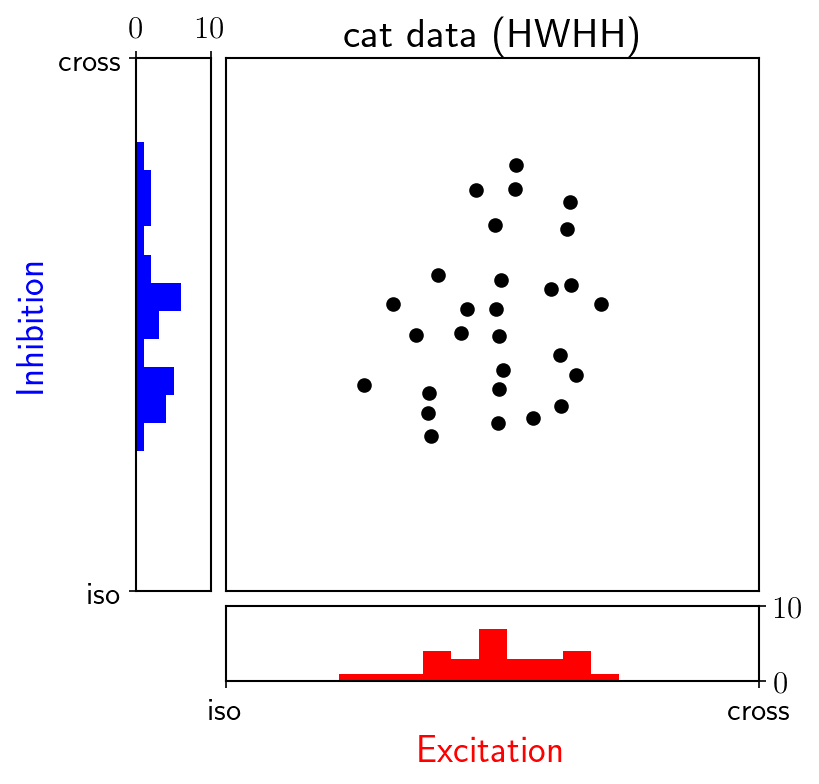

In [24]:
or_pref = numpy.array([[76.80347270430994, 82.41073594232232],
[177.80948637097381, 175.93738760967202],
[115.60793235252302, 115.31812213012603],
[108.27761561044153, 111.24572394008078],
[51.57869204841043, 52.48199663769958],
[39.87638109416949, 39.54818042672778],
[7.70669365428526, 1.1216031983673815],
[20.526091283947096, 10.36918393121502],
[15.014427781634481, 10.72674199780866],
[13.158136850645235, 15.51802009016319],
[19.366850394359318, 24.38320188021177],
[3.188665200190684, 28.038574451535197],
[4.596314851832972, 43.16440979918201],
[4.513511931148145, 63.45112536696749],
[15.749115514256346, 100.72824750545746],
[2.455482975217677, 117.66821956992666],
[0.4471357716981288, 159.71328443221452],
[4.825152014452868, 167.09930495730214],
[12.935321718620628, 160.10772743620413],
[19.530950728080228, 164.17862011860055],
[7.721748730773442, 177.43310945877]])



or_pref = (or_pref % 90)/180*numpy.pi

cond_plot(or_pref.T[0],or_pref.T[1],'cat data (or pref)')

hwhh = numpy.array([[23.29443132118716, 34.861660079051376],
[34.12844680403208, 33.438735177865595],
[33.96426316158758, 30.059288537549392],
[34.51224360923359, 26.146245059288518],
[45.86406904132659, 28.458498023715407],
[46.01913137030192, 34.150197628458486],
[51.719250649016544, 29.169960474308283],
[56.50373038332904, 31.30434782608694],
[58.9685899384896, 36.46245059288536],
[56.29253689454359, 39.84189723320157],
[46.7165610309423, 37.35177865612647],
[45.98404939542064, 43.04347826086955],
[63.18123348223685, 48.55731225296441],
[58.19818977009612, 51.7588932806324],
[54.82821526299787, 51.04743083003951],
[45.610777182683535, 47.66798418972331],
[40.64036298150009, 47.66798418972331],
[39.59141193254905, 43.57707509881421],
[31.95967911686978, 43.221343873517775],
[28.210819281053404, 48.55731225296441],
[35.64749631639265, 53.35968379446639],
[46.30189208784529, 52.47035573122528],
[57.4509437051243, 61.185770750988134],
[57.96594709638188, 65.63241106719366],
[45.377131229974054, 61.89723320158102],
[48.72605655214352, 67.94466403162053],
[48.887433636597535, 72.03557312252963],
[42.15871085436305, 67.76679841897231]])

hwhh = hwhh/180*numpy.pi

cond_plot(hwhh.T[0],hwhh.T[1],'cat data (HWHH)')


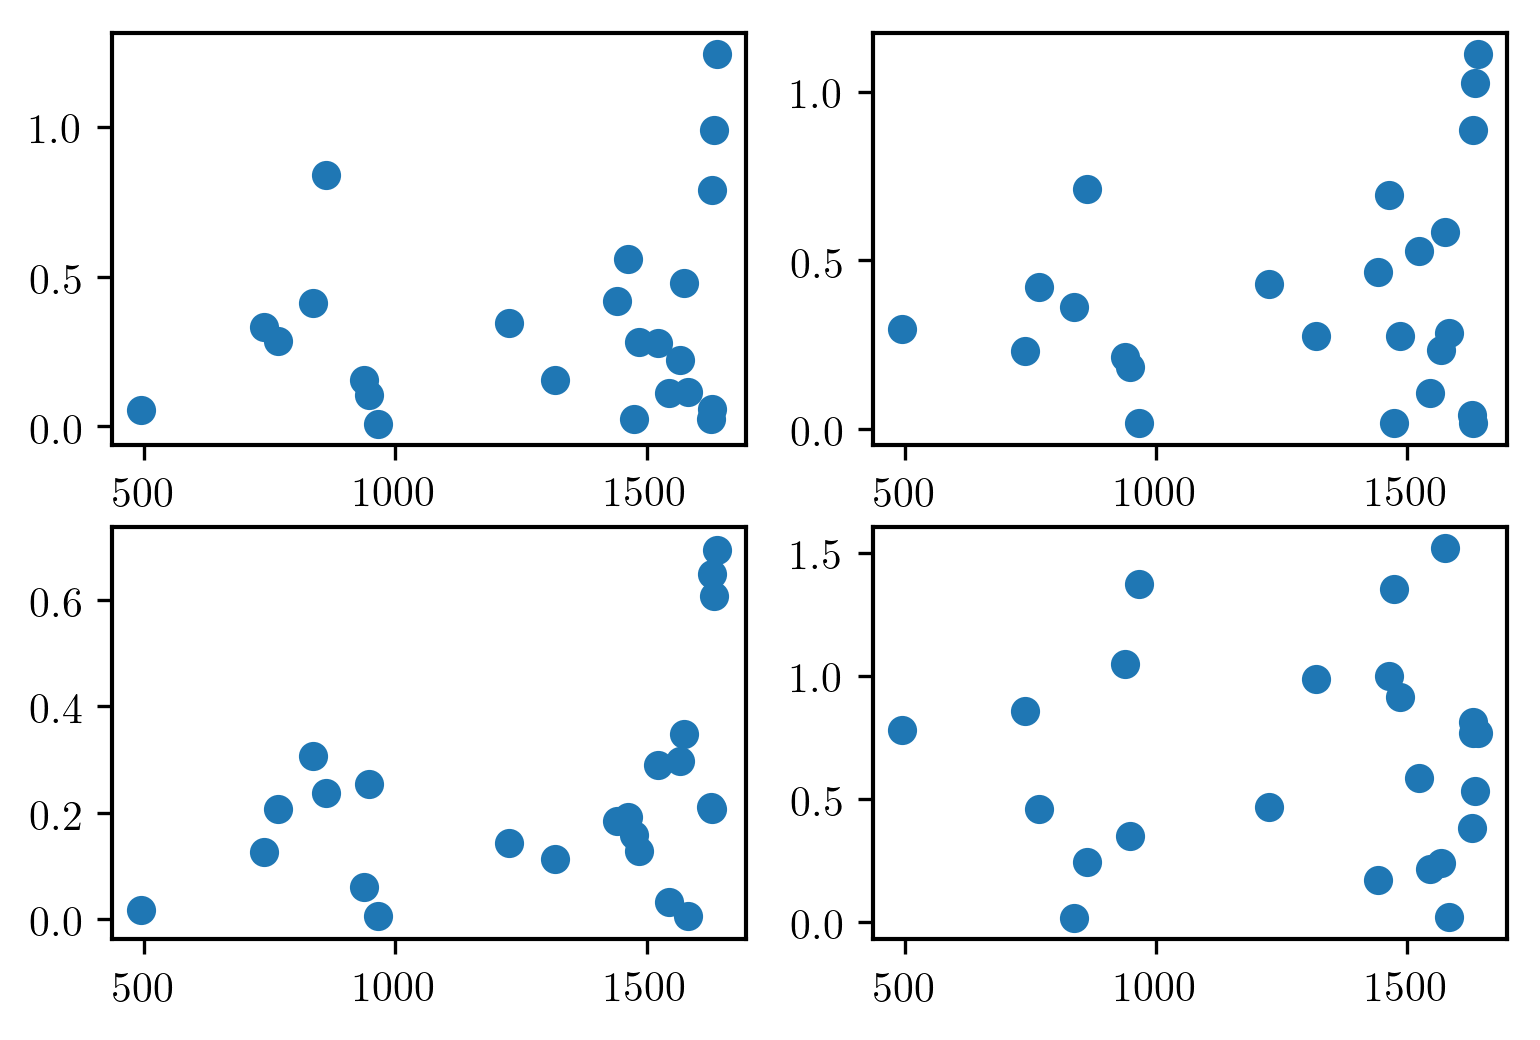

In [30]:
lhis = lhi.get_value_by_id(l4_ids)
pylab.figure(dpi=300)
pylab.subplot(221)
pylab.scatter(lhis,or_pref_F0_Exc_L4)
pylab.subplot(222)
pylab.scatter(lhis,or_pref_F0_Inh_L4)
pylab.subplot(223)
pylab.scatter(lhis,or_pref_F1_Exc_L4)
pylab.subplot(224)
pylab.scatter(lhis,or_pref_F1_Inh_L4)


In [38]:
or_err_L4_inh = queries.param_filter_query(data_store,value_name=['orientation fitting error of Firing rate'],sheet_name=["V1_Inh_L4"],st_contrast=100,ads_unique=True).get_analysis_result()[0]

(array([  2.,  22.,  66.,  21.,   6.,   0.,   2.,   0.,   0.,   1.]),
 array([ 17.91461984,  25.43891385,  32.96320786,  40.48750187,
         48.01179588,  55.53608989,  63.0603839 ,  70.58467791,
         78.10897193,  85.63326594,  93.15755995]),
 <a list of 10 Patch objects>)

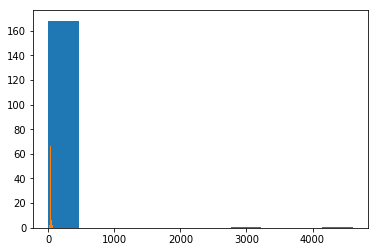

In [64]:
a = queries.param_filter_query(data_store,sheet_name='V1_Exc_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
b = queries.param_filter_query(data_store,sheet_name='V1_Inh_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids_inh)

pylab.hist(a)
pylab.hist(b)

In [65]:
spont_l4exc_pnv = param_filter_query(data_store,st_name='InternalStimulus',analysis_algorithm='TrialAveragedFiringRate',sheet_name="V1_Exc_L4",value_name='Firing rate').get_analysis_result()[0]
spont_l4inh_pnv = param_filter_query(data_store,st_name='InternalStimulus',analysis_algorithm='TrialAveragedFiringRate',sheet_name="V1_Inh_L4",value_name='Firing rate').get_analysis_result()[0]
        
r=1.0
base = queries.param_filter_query(data_store,sheet_name='V1_Exc_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation baseline of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
mmax = queries.param_filter_query(data_store,sheet_name='V1_Exc_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids)
#responsive_spike_ids = numpy.array(spike_ids)[numpy.array(base)+numpy.array(mmax) > r]
responsive_spike_ids = numpy.array(spike_ids)[numpy.array(or_err_L4.get_value_by_id(spike_ids))<0.3]
print str(100* (1 - len(responsive_spike_ids) / (len(spike_ids)*1.0)) ) + '% removed from V1_Exc_L4'
hwhh_l4E = numpy.array(queries.param_filter_query(data_store,sheet_name='V1_Exc_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids))
base = numpy.array(queries.param_filter_query(data_store,sheet_name='V1_Exc_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation baseline of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids))
mmax = numpy.array(queries.param_filter_query(data_store,sheet_name='V1_Exc_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids))
idx = numpy.logical_and(base>=0,mmax>=0)
base = base[idx]
mmax = mmax[idx]
sp = numpy.array(spont_l4exc_pnv.get_value_by_id(responsive_spike_ids))[idx]
rura_l4E = ((numpy.array(base)-numpy.array(sp))/(numpy.array(base)+numpy.array(mmax)-numpy.array(sp)))

base = queries.param_filter_query(data_store,sheet_name='V1_Inh_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation baseline of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids_inh)
mmax = queries.param_filter_query(data_store,sheet_name='V1_Inh_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(spike_ids_inh)
#responsive_spike_ids = numpy.array(spike_ids_inh)[numpy.array(base)+numpy.array(mmax) > r]
responsive_spike_ids = numpy.array(spike_ids_inh)[numpy.array(or_err_L4_inh.get_value_by_id(spike_ids_inh))<0.3]
print str(100* (1 - len(responsive_spike_ids) / (len(spike_ids_inh)*1.0)) ) + '% removed from V1_Inh_L4'
hwhh_l4I = numpy.array(queries.param_filter_query(data_store,sheet_name='V1_Inh_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation HWHH of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids))
base = numpy.array(queries.param_filter_query(data_store,sheet_name='V1_Inh_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation baseline of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids))
mmax = numpy.array(queries.param_filter_query(data_store,sheet_name='V1_Inh_L4',st_name=['FullfieldDriftingSinusoidalGrating'],st_contrast=100,value_name=['orientation max of Firing rate'],ads_unique=True).get_analysis_result()[0].get_value_by_id(responsive_spike_ids))
idx = numpy.logical_and(base>=0,mmax>=0)
base = base[idx]
mmax = mmax[idx]
sp = numpy.array(spont_l4inh_pnv.get_value_by_id(responsive_spike_ids))[idx]
rura_l4I = ((numpy.array(base)-numpy.array(sp))/(numpy.array(base)+numpy.array(mmax)-numpy.array(sp)))


8.82352941176% removed from V1_Exc_L4


/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


5.0% removed from V1_Inh_L4


In [63]:
print numpy.sum(rura_l4E>0.1)
print numpy.sum(rura_l4I>0.1)

5
13


/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(-50, 50)

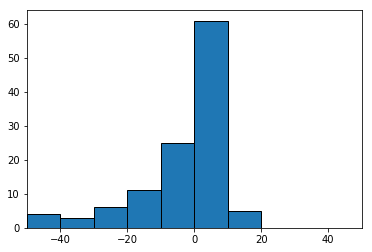

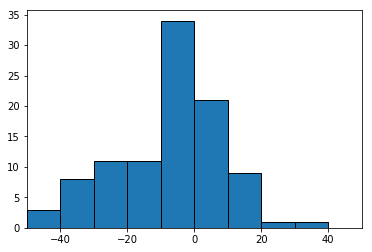

In [61]:
pylab.figure()
pylab.hist(rura_l4E*100,bins=numpy.arange(-50,50,10),edgecolor='k')
pylab.xlim(-50,50)
pylab.figure()
pylab.hist(rura_l4I*100,bins=numpy.arange(-50,50,10),edgecolor='k')
pylab.xlim(-50,50)


(0, 100)

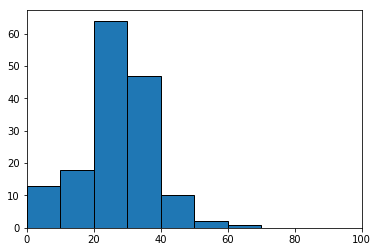

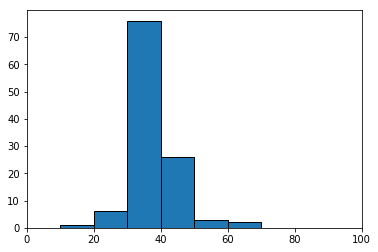

In [69]:
pylab.figure()
pylab.hist(hwhh_l4E,bins=numpy.arange(-50,100,10),edgecolor='k')
pylab.xlim(0,100)
pylab.figure()
pylab.hist(hwhh_l4I,bins=numpy.arange(-50,100,10),edgecolor='k')
pylab.xlim(0,100)



In [78]:
print numpy.sum(hwhh_l4E>45)*1.0/len(hwhh_l4E)
print numpy.sum(hwhh_l4I>45)*1.0/len(hwhh_l4I)

0.0258064516129
0.166666666667


In [11]:
dsv = param_filter_query(data_store,identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')
LocalHomogeneityIndex(dsv,ParameterSet({'sigma' : 0.1})).analyse()


  Starting LocalHomogeneityIndex analysis
LocalHomogeneityIndex analysis took: 602.815907001seconds


In [9]:
param_filter_query(data_store,analysis_algorithm='LocalHomogeneityIndex').print_content()

  DSV info:
     Number of recordings: 0
     Number of ADS: 1
       PerNeuronValue : 1


In [8]:
MozaikParametrized.idd(data_store.analysis_results[-1].stimulus_id)

AssertionError: The object passed to the idd class method is not string: <type 'NoneType'>

In [5]:
lhi_ads = data_store.analysis_results.pop()

In [7]:
lhi_ads.stimulus_id

'None'

In [258]:
import matplotlib
matplotlib.use('Agg')


/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/ipykernel/ker

PerNeuronValuePlot plotting took: 0.322773933411seconds


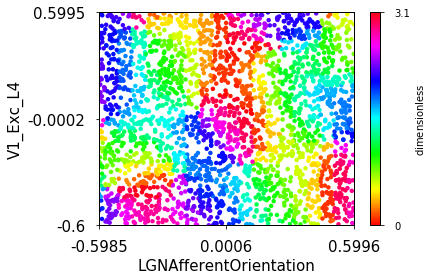

In [4]:
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4'],value_name='LGNAfferentOrientation')   
mozaik.visualization.plotting.PerNeuronValuePlot(dsv,ParameterSet({"cortical_view" : True}),plot_file_name='ORSet.png').plot()


PerNeuronValuePlot plotting took: 0.149622917175seconds


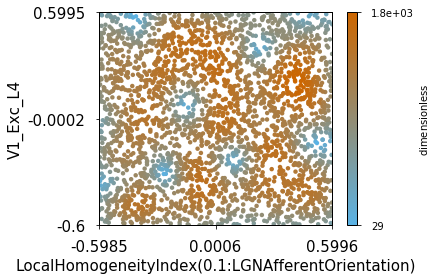

In [19]:
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4'],analysis_algorithm='LocalHomogeneityIndex',value_name='LocalHomogeneityIndex(0.1:LGNAfferentOrientation)')  
lhi = dsv.get_analysis_result()[0]
mozaik.visualization.plotting.PerNeuronValuePlot(dsv,ParameterSet({"cortical_view" : True}),plot_file_name='ORSet.png').plot()
